In [1]:
import numpy as np
import pandas as pd
import sys 
sys.path.append('/home/riccardo/GraRed')
from GraRed import Catalogue
import matplotlib.pyplot as plt
import astropy as ast
from astropy import units as u
from astropy.coordinates import SkyCoord as SC
import astropy.cosmology.units as cu
from astropy.cosmology import Planck18
from GraRed import utils as ut


In [2]:
df =pd.read_parquet('/home/riccardo/GraRed/Data/SDSS_galaxy_cat.parquet')
#df=dd.loc[np.random.choice(dd.index,50000)]
gal = Catalogue.Galaxies(df['RA[deg]'].values,df['DEC[deg]'].values,df['Z'].values,redshift_err=df['zerr'].values)


In [3]:
df =pd.read_parquet('/home/riccardo/GraRed/Data/WH15_cluster_cat.parquet')
m = 1.08*np.log10(df.RL500.values) - 1.37 +14
df['M500']=10**m

rand_gen = np.random.default_rng(1234)


dd = df.loc[rand_gen.choice(df.index,1000,replace=False)]


In [4]:
cl = Catalogue.Cluster(dd['RA[deg]'].values,dd['Dec[deg]'].values,dd['z'].values,mass=dd['M500'].values,radius=dd['R500[Mpc]'].values,
concentration=None,is_crit=True, delta=500,gravity='GR', seed=1234)
cl.data

if the masses are in logharitmic scale, please change it or the code will not work


,ID,RA,Dec,redshift,M_500,Dc,Dm,R_500
0,0,223.77908,20.08905,0.2708,5.289428e+13,1121.341217,1121.341217,0.53
1,1,236.52069,16.87424,0.3303,1.163456e+14,1346.308111,1346.308111,0.68
2,2,156.68929,15.43678,0.6222,9.972391e+13,2342.151848,2342.151848,0.58
3,3,17.24220,24.90027,0.1970,1.526852e+14,831.565628,831.565628,0.71
4,4,177.98593,21.18941,0.6100,1.237191e+14,2303.950910,2303.950910,0.65
...,...,...,...,...,...,...,...,...
995,995,237.51624,4.02152,0.6377,1.750796e+14,2390.278275,2390.278275,0.69
996,996,131.83258,23.22121,0.2249,7.256533e+13,942.518023,942.518023,0.65
997,997,233.01314,28.46441,0.2150,1.818835e+14,903.343192,903.343192,0.81
998,998,259.47128,55.69589,0.2976,1.981174e+14,1223.623390,1223.623390,0.81


In [5]:
%%time
cl.compute_cluster_center(gal.data, radians=False, v_cut=2500., r_cut=1.)
cl.data

/home/riccardo/GraRed/GraRed/utils.py:86: RuntimeWarning: invalid value encountered in sqrt
  theta=2*np.arcsin(np.sqrt(a+b))


CPU times: user 43.7 s, sys: 31.9 ms, total: 43.7 s
Wall time: 43.9 s


,ID,RA,Dec,redshift,M_500,Dc,Dm,R_500,new_RA,new_Dec,new_redshift,num_mean_centr
0,0,223.77908,20.08905,0.2708,5.289428e+13,1121.341217,1121.341217,0.53,223.779080,20.089050,0.270800,1
1,1,236.52069,16.87424,0.3303,1.163456e+14,1346.308111,1346.308111,0.68,236.520690,16.874240,0.330300,1
2,2,156.68929,15.43678,0.6222,9.972391e+13,2342.151848,2342.151848,0.58,156.689290,15.436780,0.622200,1
3,3,17.24220,24.90027,0.1970,1.526852e+14,831.565628,831.565628,0.71,17.242200,24.900270,0.197000,1
4,4,177.98593,21.18941,0.6100,1.237191e+14,2303.950910,2303.950910,0.65,177.985930,21.189410,0.610000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,237.51624,4.02152,0.6377,1.750796e+14,2390.278275,2390.278275,0.69,237.516240,4.021520,0.637700,1
996,996,131.83258,23.22121,0.2249,7.256533e+13,942.518023,942.518023,0.65,131.832580,23.221210,0.224900,1
997,997,233.01314,28.46441,0.2150,1.818835e+14,903.343192,903.343192,0.81,233.004910,28.455343,0.214974,3
998,998,259.47128,55.69589,0.2976,1.981174e+14,1223.623390,1223.623390,0.81,259.480725,55.693611,0.297589,2


In [6]:
%%time
cl.compute_vel_distr(gal.data)
cl.data

/home/riccardo/GraRed/GraRed/utils.py:86: RuntimeWarning: invalid value encountered in sqrt
  theta=2*np.arcsin(np.sqrt(a+b))


CPU times: user 48.1 s, sys: 91.7 ms, total: 48.2 s
Wall time: 48.4 s


,ID,RA,Dec,redshift,M_500,Dc,Dm,R_500,new_RA,new_Dec,new_redshift,num_mean_centr,dist_member,vel_member,num_member
0,0,223.77908,20.08905,0.2708,5.289428e+13,1121.341217,1121.341217,0.53,223.779080,20.089050,0.270800,1,[0.0],[0.004467256],1
1,1,236.52069,16.87424,0.3303,1.163456e+14,1346.308111,1346.308111,0.68,236.520690,16.874240,0.330300,1,"[3.1496825401646955, 0.0]","[-1761.1173, -0.017869024]",2
2,2,156.68929,15.43678,0.6222,9.972391e+13,2342.151848,2342.151848,0.58,156.689290,15.436780,0.622200,1,[0.0],[-0.008934512],1
3,3,17.24220,24.90027,0.1970,1.526852e+14,831.565628,831.565628,0.71,17.242200,24.900270,0.197000,1,[0.0],[0.013401767],1
4,4,177.98593,21.18941,0.6100,1.237191e+14,2303.950910,2303.950910,0.65,177.985930,21.189410,0.610000,1,[0.0],[0.0],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,237.51624,4.02152,0.6377,1.750796e+14,2390.278275,2390.278275,0.69,237.516240,4.021520,0.637700,1,[0.0],[0.008934512],1
996,996,131.83258,23.22121,0.2249,7.256533e+13,942.518023,942.518023,0.65,131.832580,23.221210,0.224900,1,[0.0],[0.0],1
997,997,233.01314,28.46441,0.2150,1.818835e+14,903.343192,903.343192,0.81,233.004910,28.455343,0.214974,3,"[3.4561873502830007, 1.6653919146116707, 0.401...","[60.196274, -54.580933, -75.76019, 69.25587, 6...",5
998,998,259.47128,55.69589,0.2976,1.981174e+14,1223.623390,1223.623390,0.81,259.480725,55.693611,0.297589,2,"[0.07533661689413763, 0.07536096957653471]","[-2.5016632, 2.5105977]",2


In [7]:
df=cl.data[cl.data.num_mean_centr > 1]
dist=[]
dist1=[]
dist2=[]

redshift=[]
redshift=df.redshift.values*cu.redshift
Mpc=[]
Mpc=redshift.to(u.Mpc,cu.with_redshift(Planck18,distance="comoving"))

new_redshift=[]
new_redshift=df.new_redshift.values*cu.redshift
new_Mpc=[]
new_Mpc=new_redshift.to(u.Mpc,cu.with_redshift(Planck18,distance="comoving"))

dist1=SC(ra=df.RA*u.degree, dec=df.Dec*u.degree,distance=Mpc)
dist2 = SC(ra=df.new_RA*u.degree, dec=df.new_Dec*u.degree,distance=new_Mpc)


dist=ut.dist_sky(np.radians(df.RA),np.radians(df.Dec),
                 np.radians(df.new_RA),np.radians(df.new_Dec),
                 dm1=Mpc,r5=None,normalized=False)
print(dist1.separation_3d(dist2)-dist)

6      0.027191
8      0.327453
11     0.046426
15     0.318912
20     1.226728
         ...   
988    1.146434
991    0.040613
992    2.196945
997    0.207140
998    0.126662
Length: 367, dtype: float64


In [8]:

print(df)
vel=df.vel_member
print(vel)

      ID         RA       Dec  redshift         M_500           Dc  \
6      6  333.27240  -9.36873    0.2835  4.874297e+13  1170.005883   
8      8  170.04488  25.74964    0.3656  1.368350e+14  1476.156074   
11    11  147.44522  10.40518    0.3171  1.838919e+14  1297.062894   
15    15  247.92110  32.76499    0.2950  2.450881e+14  1213.768977   
20    20  132.01428  52.15411    0.2513  2.486972e+14  1045.934039   
..   ...        ...       ...       ...           ...          ...   
988  988  239.08577  12.80372    0.3724  1.011793e+14  1500.862195   
991  991  252.83472  20.60586    0.2639  1.389805e+14  1094.753765   
992  992  118.44469  23.03253    0.5029  2.632973e+14  1956.151765   
997  997  233.01314  28.46441    0.2150  1.818835e+14   903.343192   
998  998  259.47128  55.69589    0.2976  1.981174e+14  1223.623390   

              Dm  R_500      new_RA    new_Dec  new_redshift  num_mean_centr  \
6    1170.005883   0.56  333.272410  -9.368721      0.283493               2   

In [9]:
%%time
cl.compute_vel_distr(gal.data, new=False)
df=cl.data[cl.data.num_mean_centr > 1]
#print(df)
vel1=df.vel_member
print(vel1)

/home/riccardo/GraRed/GraRed/utils.py:86: RuntimeWarning: invalid value encountered in sqrt
  theta=2*np.arcsin(np.sqrt(a+b))


6                              [-34.8714, -3.3191712]
8                                         [2.4301872]
11                           [-1146.6284, -5.6376767]
15                    [1028.675, -390.5007, 396.1205]
20                                         [151.1228]
                            ...                      
988    [-986.03955, -113.9865, 155.65706, -138.16328]
991                 [916.8328, -4.9988594, 607.21625]
992                                      [-261.43274]
997       [53.714287, -61.06292, -82.24218, 62.77388]
998                             [75.8004, -5.0033264]
Name: vel_member, Length: 367, dtype: object
CPU times: user 49.5 s, sys: 76.1 ms, total: 49.6 s
Wall time: 49.8 s


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.9888887e+03, -3.5903555e+03, -3.1918220e+03, -2.7932888e+03,
        -2.3947556e+03, -1.9962223e+03, -1.5976890e+03, -1.1991558e+03,
        -8.0062244e+02, -4.0208917e+02, -3.5559082e+00,  3.9497736e+02,
         7.9351062e+02,  1.1920439e+03,  1.5905771e+03,  1.9891105e+03,
         2.3876438e+03,  2.7861770e+03,  3.1847102e+03,  3.5832437e+03,
         3.9817769e+03], dtype=float32),
 <a list of 367 BarContainer objects>)

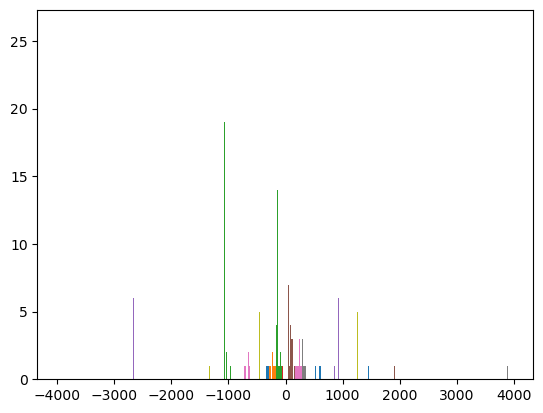

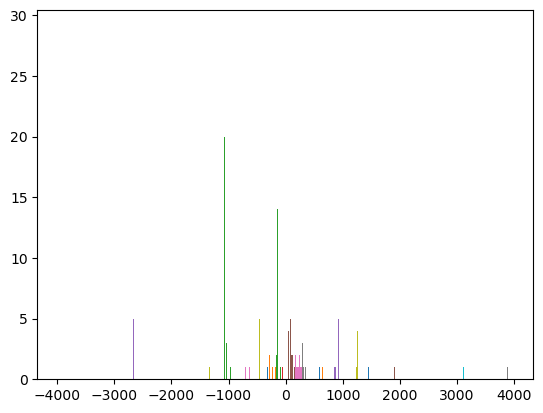

In [14]:
plt.figure()
plt.hist(vel,bins=20)
plt.figure()
plt.hist(vel1,bins=20)